## 窗口计算
DataFrame对象的`rolling`方法允许我们将数据置于窗口中,之后可以使用函数对窗口中的数据进行处理.
Example:
    我们获取了百度的近期股票数据,计划制作5日均线和10日均线,需要先设置窗口再进行运算,主要使用到第三方库`pandas-datareader`

In [11]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
# 获取百度的股票
baidu_df = pdr.get_data_stooq('BIDU',start='2021-12-04', end='2021-12-19').sort_index()

In [7]:
baidu_df
# 五个列分别代表 开盘价、最高价、最低价、收盘价和成交量

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-06,136.250,147.80,136.11,147.65,4962278
2021-12-07,150.180,151.61,147.10,149.89,4327345
2021-12-08,147.170,150.67,146.21,148.93,2864314
2021-12-09,148.685,154.28,148.12,148.69,2825701
2021-12-10,148.000,150.56,147.31,149.34,2932520
2021-12-13,147.650,147.68,143.46,144.55,2915092
2021-12-14,140.570,145.37,140.53,142.89,2420134
2021-12-15,141.000,141.46,136.45,141.41,4023886
2021-12-16,142.550,145.84,139.85,140.17,2748176


In [10]:
# close列的数据就是我们需要的5日均线
baidu_df.Close.rolling(5).mean()

Date
2021-12-06        NaN
2021-12-07        NaN
2021-12-08        NaN
2021-12-09        NaN
2021-12-10    148.900
2021-12-13    148.280
2021-12-14    146.880
2021-12-15    145.376
2021-12-16    143.672
2021-12-17    142.222
Name: Close, dtype: float64

### 相关性判断
在统计学中,我们通常使用协方差(covariance)来衡量两个随机变量的联合变化程度,如果 $X$ 的较大值主要与另一个变量 $Y$的较大值相对应,而两者较小值也相对应,那么两个变量倾向于表现出相似的行为,协方差为正.相反,如果较大值与另一个变量的较小值相对应,协方差为负.
方差则是协方差的特殊情况,即变量与自身的协方差
$$ cov(X,Y) = E((X - \mu)(Y - \upsilon)) = E(X \cdot Y) - \mu\upsilon $$

如果X和Y是统计独立的,则COV=0,因为X和Y独立时:
$$ E(X \cdot Y) = E(X) \cdot E(Y) = \mu\upsilon $$
#### 皮尔逊相关系数(Pearson)
协方差的数值大小取决于变量的大小，通常是不容易解释的，但是正态形式的协方差大小可以显示两变量线性关系的强弱。在统计学中，皮尔逊积矩相关系数就是正态形式的协方差，它用于度量两个变量 $X$ 和 $Y$ 之间的相关程度（线性相关），其值介于-1到1之间。

$$ \rho{X,Y} = \frac {cov(X, Y)} {\sigma_{X}\sigma_{Y}} $$

估算样本的协方差和标准差，可以得到样本皮尔逊系数，通常用希腊字母 $\rho$ 表示。
$$ \rho = \frac {\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})} {\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}} $$

我们用 $\rho$ 值判断指标的相关性时遵循以下两个步骤。

判断指标间是正相关、负相关，还是不相关。
当 $ \rho \gt 0 $，认为变量之间是正相关，也就是两者的趋势一致。
当 $ \rho \lt 0 $，认为变量之间是负相关，也就是两者的趋势相反。
当 $ \rho = 0 $，认为变量之间是不相关的，但并不代表两个指标是统计独立的。
判断指标间的相关程度。
当 $ \rho $ 的绝对值在 $ [0.6,1] $ 之间，认为变量之间是强相关的。
当 $ \rho $ 的绝对值在 $ [0.1,0.6) $ 之间，认为变量之间是弱相关的。
当 $ \rho $ 的绝对值在 $ [0,0.1) $ 之间，认为变量之间没有相关性.

皮尔逊相关系数适用于：

两个变量之间是线性关系，都是连续数据。
两个变量的总体是正态分布，或接近正态的单峰分布。
两个变量的观测值是成对的，每对观测值之间相互独立.

DataFrame对象的cov方法和corr方法分别用于计算协方差和相关系数,corr方法的method参数默认为皮尔逊相关系数,除此之外,还可以使用kendall或spearman来获得肯德尔系数或斯皮尔曼等级相关系数

### 相关系数案例-Boston房价
corr()方法 获得一个DataFrame对象,总共13个因素,形状为14*14(其中有一个为price),数据为横纵坐标的相关系数
可以发现,对角线全为1

In [31]:
boston_df = pd.read_csv('res/boston_house_price.csv')
a = boston_df.corr(method='pearson')
a.style.background_gradient('RdYlBu', subset=['PRICE'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


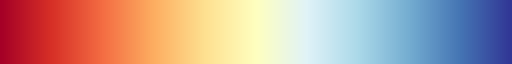

In [27]:
from matplotlib import pyplot as plt

plt.get_cmap('RdYlBu')
#上面代码中的RdYlBu代表的颜色如下所示，相关系数的数据值越接近1，颜色越接近红色；数据值越接近1，颜色越接近蓝色；数据值在0附近则是黄色.

In [33]:
a.PRICE.sort_values(ascending=False)

PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

## Index的应用
Index类型为Series和DataFrame对象提供了索引服务,常见的有下列

### RangeIndex(范围索引)

In [35]:
sales_data = np.random.randint(400,1000,12)
month_index = pd.RangeIndex(1,13,name='月份')
ser = pd.Series(data =sales_data,index=month_index)
ser

月份
1     938
2     871
3     539
4     749
5     650
6     485
7     561
8     425
9     735
10    628
11    661
12    491
dtype: int64

### CategoricalIndex(分类索引)

In [37]:
cate_index = pd.CategoricalIndex(
    ['苹果','香蕉','苹果','苹果','桃子','香蕉'],
    ordered=True,
    categories=['苹果','香蕉','桃子']
)
ser = pd.Series(data=[6,6,7,6,8,6], index=cate_index)
ser

苹果    6
香蕉    6
苹果    7
苹果    6
桃子    8
香蕉    6
dtype: int64

In [38]:
ser.groupby(level=0).sum()

苹果    19
香蕉    12
桃子     8
dtype: int64

### MultiIndex(多级索引,多索引)

In [65]:
ids = np.arange(1001,1006)
sms = ['期中','期末']
index = pd.MultiIndex.from_product((ids,sms),names=['学号','学期']) #笛卡尔积
courses = list('语数英')
scores = np.random.randint(60,101,(10,3))
df = pd.DataFrame(data=scores,index=index,columns=courses)
df

语   数   英
学号   学期            
1001 期中  79  98  80
     期末  86  91  92
1002 期中  84  82  69
     期末  66  79  60
1003 期中  80  82  66
     期末  87  81  63
1004 期中  92  81  75
     期末  94  83  76
1005 期中  77  90  92
     期末  80  87  67

In [53]:
df.loc[1001,'期中'].语

90

#### 计算每个人的综合成绩,期中成绩占比.25,期末成绩占比.75

In [67]:
df1= df.groupby(level=0).agg(lambda x: x.values[0] * 0.25 + x.values[1] * 0.75)

In [76]:
df1.agg(sum,axis=1)

学号
1001    266.00
1002    212.50
1003    230.25
1004    251.75
1005    240.25
dtype: float64

### DatetimeIndex(时间日期索引)

In [77]:
pd.date_range(start='2021-12-15',end='2022-01-01',periods=10)
# 平均分成十个时期

DatetimeIndex(['2021-12-15 00:00:00', '2021-12-16 21:20:00',
               '2021-12-18 18:40:00', '2021-12-20 16:00:00',
               '2021-12-22 13:20:00', '2021-12-24 10:40:00',
               '2021-12-26 08:00:00', '2021-12-28 05:20:00',
               '2021-12-30 02:40:00', '2022-01-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [85]:
pd.date_range('2021-12-20', '2022-02-14', freq='W-MON')
# 获取每个区间的每个周一 左右全开

DatetimeIndex(['2021-12-20', '2021-12-27', '2022-01-03', '2022-01-10',
               '2022-01-17', '2022-01-24', '2022-01-31', '2022-02-07',
               '2022-02-14'],
              dtype='datetime64[ns]', freq='W-MON')

In [86]:
# 设置时间偏置
pd.date_range('2021-12-20', '2022-02-14', freq='W-MON')-pd.DateOffset(days =2)

DatetimeIndex(['2021-12-18', '2021-12-25', '2022-01-01', '2022-01-08',
               '2022-01-15', '2022-01-22', '2022-01-29', '2022-02-05',
               '2022-02-12'],
              dtype='datetime64[ns]', freq=None)

shift()方法,对数据进行时间推移

In [90]:
baidu_df.shift(3, fill_value=0)

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-06,0.000,0.00,0.00,0.00,0
2021-12-07,0.000,0.00,0.00,0.00,0
2021-12-08,0.000,0.00,0.00,0.00,0
2021-12-09,136.250,147.80,136.11,147.65,4962278
2021-12-10,150.180,151.61,147.10,149.89,4327345
2021-12-13,147.170,150.67,146.21,148.93,2864314
2021-12-14,148.685,154.28,148.12,148.69,2825701
2021-12-15,148.000,150.56,147.31,149.34,2932520
2021-12-16,147.650,147.68,143.46,144.55,2915092


In [93]:
baidu_df.asfreq('5D').bfill()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-06,136.25,147.80,136.11,147.65,4962278.0
2021-12-11,142.55,145.84,139.85,140.17,2748176.0
2021-12-16,142.55,145.84,139.85,140.17,2748176.0


### 时区转换

In [94]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [97]:
baidu_df = baidu_df.tz_convert('Asia/Shanghai')
baidu_df

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-06 00:00:00+08:00,136.250,147.80,136.11,147.65,4962278
2021-12-07 00:00:00+08:00,150.180,151.61,147.10,149.89,4327345
2021-12-08 00:00:00+08:00,147.170,150.67,146.21,148.93,2864314
2021-12-09 00:00:00+08:00,148.685,154.28,148.12,148.69,2825701
2021-12-10 00:00:00+08:00,148.000,150.56,147.31,149.34,2932520
2021-12-13 00:00:00+08:00,147.650,147.68,143.46,144.55,2915092
2021-12-14 00:00:00+08:00,140.570,145.37,140.53,142.89,2420134
2021-12-15 00:00:00+08:00,141.000,141.46,136.45,141.41,4023886
2021-12-16 00:00:00+08:00,142.550,145.84,139.85,140.17,2748176
